# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 9 Task 2 - Regression Models
### Assignment by: Kat Weissman

#### General objective:

- Practice and become familiar with regressions

#### Python Learning Objectives:
- Regression models
- Regression trees
- Random Forest
- Neural Networks
- Other models

*Recommended learning resources:*
- https://realpython.com/linear-regression-in-python/
- https://seaborn.pydata.org/tutorial/regression.html
- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
- https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
- https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d
- https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
- https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.25281&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
- https://medium.com/analytics-vidhya/5-regression-algorithms-you-need-to-know-theory-implementation-37993382122d
- https://www.analyticssteps.com/blogs/7-types-regression-technique-you-should-know-machine-learning
- https://www.w3schools.com/python/python_ml_getting_started.asp
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://scikit-learn.org/stable/modules/preprocessing.html

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

### Level 1

### Exercise 1 
Create at least three different regression models to try to predict DelayedFlights.csv's flight delay (ArrDelay) as best you can. The data set is at https://www.kaggle.com/giovamata/airlinedelaycauses

In [2]:
pd.set_option('display.max_columns', None)  #set display to show all columns

In [3]:
data_link = '/Users/kat/Library/Mobile Documents/com~apple~CloudDocs/IT Academy/Data Science Itinerary/Data/DelayedFlights.csv'
df = pd.read_csv(data_link)

#### Data Exploration

In [4]:
# Show number of rows and columns in dataframe
df.shape

(1936758, 30)

In [5]:
# Show column names
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# Display first 5 rows of dataframe
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
# check data set variables
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [8]:
# Check for duplicates
sum(df.duplicated())

0

Plotting a diagonal correlation matrix: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<AxesSubplot:>

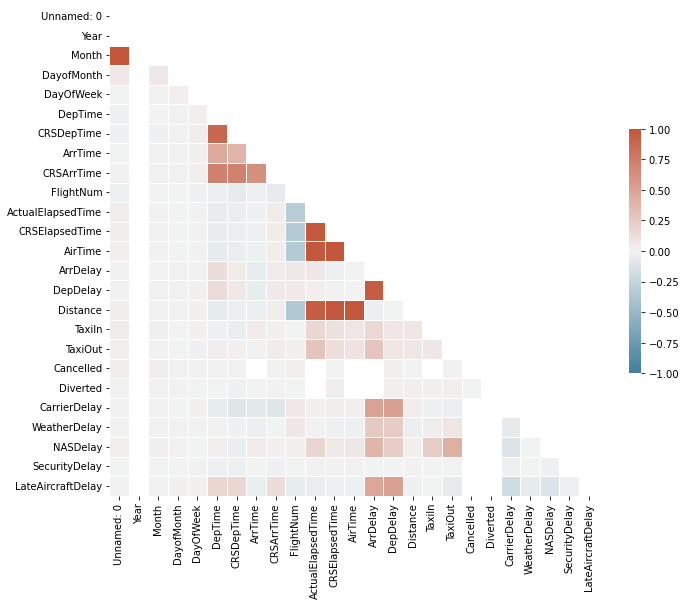

In [9]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin= -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

DepDelay is the variable most correlated with ArrDelay. DepTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, and LateAircraftDelay also have some positive correlations with ArrDelay. DepDelay could be the sum of CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay for any given flight, which is the case for Observation 3 in the data preview. This should be evaluated.

Reference for categorized delays:
https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations

In [10]:
# Create new variable which is the sum of categorized delays
df["SumDelay"] = df.CarrierDelay + df.WeatherDelay + df.NASDelay + df.SecurityDelay + df.LateAircraftDelay
# Display the summary statistics of "SumDelay" and "DepDelay" variables
print(round(df.SumDelay.describe()),2)
print(round(df.DepDelay.describe()),2)

count    1247488.0
mean          63.0
std           61.0
min           15.0
25%           26.0
50%           43.0
75%           79.0
max         2461.0
Name: SumDelay, dtype: float64 2
count    1936758.0
mean          43.0
std           53.0
min            6.0
25%           12.0
50%           24.0
75%           53.0
max         2467.0
Name: DepDelay, dtype: float64 2


In [11]:
# Create new variable which is the difference of SumDelay and DepDelay and display summary stats
df['Diff_SumDelay_DepDelay'] = df.SumDelay - df.DepDelay
print(round(df.Diff_SumDelay_DepDelay.describe()),2)

count    1247488.0
mean           4.0
std           19.0
min         -181.0
25%           -7.0
50%            0.0
75%           10.0
max          759.0
Name: Diff_SumDelay_DepDelay, dtype: float64 2


DepDelay is not always equal to the sum of the categorized delays, however the value is very close. The median difference is 0, and a great majority of observations have an absolute difference of 10 minutes or less between SumDelay and DepDelay, with an average difference of 4 minutes.

<AxesSubplot:xlabel='Diff_SumDelay_DepDelay', ylabel='Count'>

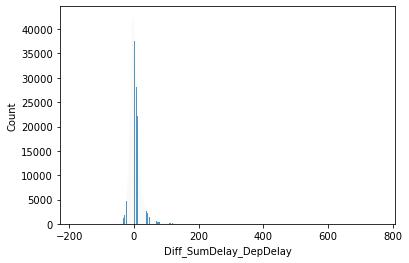

In [12]:
# Show histogram of variable representing difference of SumDelay and DepDelay
sns.histplot(data=df, x='Diff_SumDelay_DepDelay')

#### Model 1

The first model will be a linear regression of DepDelay and ArrDelay using SciKitLearn Linear Regression.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
print(df['DepDelay'].isna().sum())
print(df['ArrDelay'].isna().sum())

0
8387


First, I will remove the rows where ArrDelay is NA.

In [14]:
dfModel = df.dropna(subset=['DepDelay', 'ArrDelay'])

In [15]:
dfModel.shape

(1928371, 32)

In [16]:
x = np.array(dfModel.DepDelay).reshape((-1, 1))
y = np.array(dfModel.ArrDelay)
print(x.shape)
print(y.shape)

(1928371, 1)
(1928371,)


In [17]:
model1 = LinearRegression().fit(x, y)

In [18]:
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

intercept: -1.5759463952546824
slope: [1.01587634]


In [19]:
r_sq1 = model1.score(x, y)
r_sq1

0.9080692673713632

In [20]:
# Make predictions using model
y_pred1 = model1.predict(x)
# The mean squared error
MSE_1 = mean_squared_error(y, y_pred1)
# The coefficient of determination: 1 is perfect prediction
r2_score1 = r2_score(y, y_pred1)
# Create a variable of residuals
residuals1 = y - y_pred1
print("Mean squared error: %.5f" % MSE_1)
print("Coefficient of determination: %.5f" % r2_score1)

Mean squared error: 296.43085
Coefficient of determination: 0.90807


Reference about residuals: https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378

Using the sklearn.metrics r2_score(y, y_pred) function produces the same result as sklearn.linear_model model.score(x,y) function.

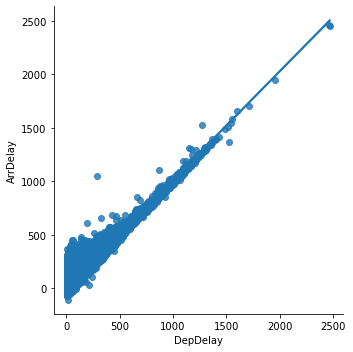

In [21]:
# Plot Seaborn linear regression model
sns.lmplot(x="DepDelay", y="ArrDelay", data=dfModel)

#### Model 2

The second model will be a multiple linear regression of ArrDelay using the variables DepTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, and LateAircraftDelay.

In [22]:
print(dfModel['ArrDelay'].isna().sum())
print(dfModel['DepTime'].isna().sum())
print(dfModel['TaxiIn'].isna().sum())
print(dfModel['TaxiOut'].isna().sum())
print(dfModel['CarrierDelay'].isna().sum())
print(dfModel['WeatherDelay'].isna().sum())
print(dfModel['NASDelay'].isna().sum())
print(dfModel['LateAircraftDelay'].isna().sum())

0
0
0
0
680883
680883
680883
680883


I will remove the rows which have NAs in the categorized delay columns.

In [23]:
dfModel2 = dfModel.dropna(subset=['CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay'])
dfModel2.shape

(1247488, 32)

In [24]:
# choose predictors
x = dfModel2[['DepTime', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay']]
# assign depenedent variable
y = dfModel2['ArrDelay']
print(x.shape)
print(y.shape)

(1247488, 7)
(1247488,)


In [25]:
model2 = LinearRegression().fit(x, y)

In [26]:
print('intercept:', round(model2.intercept_,3))
print('slope:', model2.coef_)

intercept: 0.241
slope: [-5.36332737e-05 -4.85689355e-04  5.28412700e-04  9.98769657e-01
  9.98965022e-01  9.98858272e-01  9.98819190e-01]


Because the first three variables have coefficients very close to 0, I will remove them from Model2 Multiple Linear Regression. The final second model will be a multiple linear regression of ArrDelay using the variables CarrierDelay, WeatherDelay, NASDelay, and LateAircraftDelay.

In [27]:
# choose predictors
x = dfModel2[['CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay']]
# assign depenedent variable
y = dfModel2['ArrDelay']

In [28]:
model2alt = LinearRegression().fit(x, y)

In [29]:
print('intercept:', round(model2alt.intercept_,3))
print('slope:', model2alt.coef_)

intercept: 0.166
slope: [0.99878346 0.99898102 0.99892094 0.99871879]


In [30]:
r_sq2 = model2alt.score(x, y)
r_sq2

0.9988929761012224

In [31]:
# Make predictions using model
y_pred2 = model2alt.predict(x)
# The mean squared error
MSE_2 = mean_squared_error(y, y_pred2)
# The coefficient of determination: 1 is perfect prediction
r2_score2 = r2_score(y, y_pred2)
# Create a variable of residuals
residuals2 = y - y_pred2
print("Mean squared error: %.5f" % MSE_2)
print("Coefficient of determination: %.5f" % r2_score2)

Mean squared error: 4.08609
Coefficient of determination: 0.99889


#### Model 3
Model 3 will be a Decision Tree Regressor

Reference: https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16

In [32]:
regressor = DecisionTreeRegressor(random_state=0)

In [33]:
# choose predictors
X = dfModel2[['DepTime', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay']]
# assign depenedent variable
y = dfModel2['ArrDelay']

In [34]:
model3 = regressor.fit(X,y)

In [35]:
model3.score(X, y)

0.9999990768550548

In [36]:
# Make predictions using model
y_pred3 = model3.predict(X)
# The mean squared error
MSE_3 = mean_squared_error(y, y_pred3)
# The coefficient of determination: 1 is perfect prediction
r2_score3 = r2_score(y, y_pred3)
# Create a variable of residuals
residuals3 = y - y_pred3
print("Mean squared error: %.7f" % MSE_3)
print("Coefficient of determination: %.7f" % r2_score3)

Mean squared error: 0.0034074
Coefficient of determination: 0.9999991


### Exercise 2 
Compare them based on MSE and R2.

It is also recommended to show a histogram of the difference between actual and predicted value to see graphically how good the prediction is.

In [37]:
print('Linear Regression Model 1:')
print('  coefficient of determination:', round(r_sq1,3))
print("  mean squared error: %.3f" % MSE_1)
print('Multiple Linear Regression Model 2:')
print('  coefficient of determination:', round(r_sq2,3))
print("  mean squared error: %.3f" % MSE_2)
print('Decision Tree Regression Model 3:')
print('  coefficient of determination:', round(r2_score3,3))
print("  mean squared error: %.3f" % MSE_3)


Linear Regression Model 1:
  coefficient of determination: 0.908
  mean squared error: 296.431
Multiple Linear Regression Model 2:
  coefficient of determination: 0.999
  mean squared error: 4.086
Decision Tree Regression Model 3:
  coefficient of determination: 1.0
  mean squared error: 0.003


Text(0.5, 0, 'Residuals')

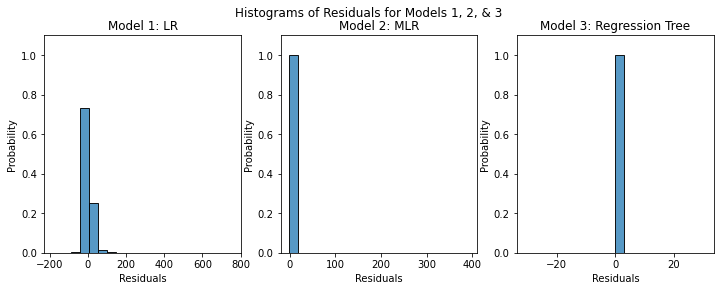

In [38]:
# Plot histograms of residuals
fig, axes = plt.subplots(1, 3, figsize=(12,4))
fig.suptitle('Histograms of Residuals for Models 1, 2, & 3')
sns.histplot(data=residuals1, stat='probability', bins=20, ax=axes[0])
axes[0].set_title("Model 1: LR")
axes[0].set_ylim(0, 1.1)
axes[0].set_xlabel("Residuals")
sns.histplot(data=residuals2, stat='probability', bins=20, ax=axes[1])
axes[1].set_title("Model 2: MLR")
axes[1].set_ylim(0, 1.1)
axes[1].set_xlabel("Residuals")
sns.histplot(data=residuals3, stat='probability', bins=20, ax=axes[2])
axes[2].set_title("Model 3: Regression Tree")
axes[2].set_ylim(0, 1.1)
axes[2].set_xlabel("Residuals")

Model 2 has a higher coefficient of determination and lower mean squared error than Model 1 which is good, however the data to produce the models was slightly different because I removed observations which had NA in the categorized delay columns. 

I will re-create Model 1 using the same observations as Model 2 and 3 and compare the scores.

Model 3 has the best coefficient of determination and mean squared error using a decision tree to do regression on  the variables 'DepTime', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay'.

In [39]:
x = np.array(dfModel2.DepDelay).reshape((-1, 1))
y = np.array(dfModel2.ArrDelay)
model1alt = LinearRegression().fit(x, y)
print('Model 1 using same data as Model 2:')
print('  intercept:', model1alt.intercept_)
print('  slope:', model1alt.coef_)
# Make predictions using model
y_pred1alt = model1alt.predict(x)
# The mean squared error
MSE_1alt = mean_squared_error(y, y_pred1alt)
# The coefficient of determination: 1 is perfect prediction
r2_score1alt = r2_score(y, y_pred1alt)
print("  Mean squared error: %.3f" % MSE_1alt)
print("  Coefficient of determination: %.3f" % r2_score1alt)

Model 1 using same data as Model 2:
  intercept: 5.7400500801114305
  slope: [0.96437186]
  Mean squared error: 357.607
  Coefficient of determination: 0.903


The Linear Regression Model 1 scores got worse when using less data. The Multiple Linear Regression Model 2 has a higher coefficient of determination which indicates using the linear combination of the categorized delays is better than using just the DepDelay variable.

Model 3 still seems to be the best model.

### Exercise 3 & Exercise 4
Train them using the different parameters they support.

Compare your performance using the train / test approach or using all data (internal validation)

I will split the data used for Model 1 into a training and testing set.

In [40]:
x = dfModel[['DepDelay']]
y = dfModel['ArrDelay']
# Split data frame into train and test set using 20% of data for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24, shuffle=True, stratify=None)

In [41]:
# Check dimensions of train and test data frames
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(1542696, 1)
(1542696,)
(385675, 1)
(385675,)


In [42]:
model1_train = LinearRegression().fit(x_train,y_train)
y_prediction1 =  model1_train.predict(x_test)
MSE_1_split = mean_squared_error(y_test, y_prediction1)
# The coefficient of determination: 1 is perfect prediction
r2_score1_split = r2_score(y_test, y_prediction1)
residuals1 = y_test - y_prediction1
print('Linear Regression Model 1:')
print('  coefficient of determination:', round(r2_score1_split,3))
print("  mean squared error: %.3f" % MSE_1_split)

Linear Regression Model 1:
  coefficient of determination: 0.909
  mean squared error: 295.733


The scores for Linear Regression Model 1 improved very very slightly using a train/test split, but they did not change much.

In [43]:
model1_train.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

The Linear Regression model does not have any parameters that need to be adjusted.

I will split the data used for Model 2 into a training and testing set.

In [44]:
x = dfModel2[['CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay']]
y = dfModel2['ArrDelay']
# Split data frame into train and test set using 20% of data for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24, shuffle=True, stratify=None)

In [45]:
# Check dimensions of train and test data frames
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(997990, 4)
(997990,)
(249498, 4)
(249498,)


In [46]:
model2_train = LinearRegression().fit(x_train,y_train)
y_prediction2 =  model2_train.predict(x_test)
MSE_2_split = mean_squared_error(y_test, y_prediction2)
# The coefficient of determination: 1 is perfect prediction
r2_score2_split = r2_score(y_test, y_prediction2)
residuals2 = y_test - y_prediction2
print('Multiple Linear Regression Model 2:')
print('  coefficient of determination:', round(r2_score2_split,3))
print("  mean squared error: %.3f" % MSE_2_split)

Multiple Linear Regression Model 2:
  coefficient of determination: 0.999
  mean squared error: 5.221


The mean squared error increased slightly, which is worse, but the coefficient of determination remained the same for Model 2 using a train/test split to create and evaluate the model.

In [47]:
model2_train.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

The Multiple Linear Regression model does not have any parameters that need to be adjusted.

I will split the data used for Model 3 into a training and testing set.

In [48]:
x = dfModel2[['DepTime', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay']]
y = dfModel2['ArrDelay']
# Split data frame into train and test set using 20% of data for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24, shuffle=True, stratify=None)

In [49]:
# Check dimensions of train and test data frames
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(997990, 7)
(997990,)
(249498, 7)
(249498,)


In [50]:
model3_train = regressor.fit(x_train,y_train)
y_prediction3 =  model3_train.predict(x_test)
MSE_3_split = mean_squared_error(y_test, y_prediction3)
# The coefficient of determination: 1 is perfect prediction
r2_score3_split = r2_score(y_test, y_prediction3)
residuals3 = y_test - y_prediction3
print('Deceision Tree Regression Model 3:')
print('  coefficient of determination:', round(r2_score3_split,3))
print("  mean squared error: %.3f" % MSE_3_split)

Deceision Tree Regression Model 3:
  coefficient of determination: 0.995
  mean squared error: 19.957


The Decision Tree regressor changed the most when using a Training & Testing Data Split. After evaluating the models with training and testing data, the Mulitple Linear Regression Model 2 has the best performance.

In [51]:
model3_train.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

For the Decision Tree Regressor, I will use alternate parameters to see if the performance can be improved.

I attempted to use criterion="absolute_error", but the run time was very long and didn't complete.

Reference: https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use

In [52]:
regressor = DecisionTreeRegressor(random_state=0, min_samples_leaf= 5, criterion="friedman_mse")
model3_train_alt = regressor.fit(x_train,y_train)
y_prediction3_alt =  model3_train_alt.predict(x_test)
MSE_3_split_alt = mean_squared_error(y_test, y_prediction3_alt)
# The coefficient of determination: 1 is perfect prediction
r2_score3_split_alt = r2_score(y_test, y_prediction3_alt)
residuals3_alt = y_test - y_prediction3_alt
print('Deceision Tree Regression Model 3:')
print('  coefficient of determination:', round(r2_score3_split_alt,3))
print("  mean squared error: %.3f" % MSE_3_split_alt)

Deceision Tree Regression Model 3:
  coefficient of determination: 0.993
  mean squared error: 24.645


Changing the parameters, using criterion="friedman_mse" and min_samples_leaf=5, the results got slightly worse.

Text(0.5, 0, 'Residuals')

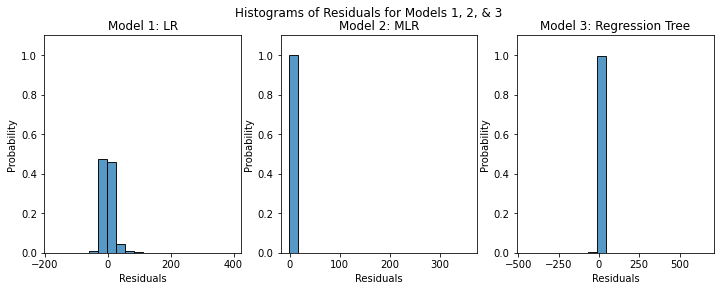

In [53]:
# Plot histograms of residuals
fig, axes = plt.subplots(1, 3, figsize=(12,4))
fig.suptitle('Histograms of Residuals for Models 1, 2, & 3')
sns.histplot(data=residuals1, stat='probability', bins=20, ax=axes[0])
axes[0].set_title("Model 1: LR")
axes[0].set_ylim(0, 1.1)
axes[0].set_xlabel("Residuals")
sns.histplot(data=residuals2, stat='probability', bins=20, ax=axes[1])
axes[1].set_title("Model 2: MLR")
axes[1].set_ylim(0, 1.1)
axes[1].set_xlabel("Residuals")
sns.histplot(data=residuals3, stat='probability', bins=20, ax=axes[2])
axes[2].set_title("Model 3: Regression Tree")
axes[2].set_ylim(0, 1.1)
axes[2].set_xlabel("Residuals")

### Level 2
### Exercise 5
Perform some variable engineering process to improve prediction

I will return to this exercise at the end of the course if I have time.

### Level 3
### Exercise 6
Do not use the DepDelay variable when making predictions

The predictions created for Model 2, the Mulitple Linear Regression model, and Model 3, the Decision Tree Regressor above do not use the DepDelay variable.